# Kaggle Titanic
## Logistic Regression with Python

For this lecture we will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous dataset.

**BL NOTE - STEPS IN END TO END SUPERVISED MACHINE LEARNING (FROM SLIDE)**

---
1.   Frame the problem
2.   Obtain Data
3.   Analyze Data
4.   Feature Engineering
5.   Model Selection
6.   Evaluation
7.   Predict on New Cases

# Step - 1 : Frame The Problem

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.



# Step - 2 : Obtain the Data

## Import Libraries

In [168]:
!pwd

/Users/Brian/Dropbox/Programming/Challenges/Kaggle Competitions/Titanic


In [169]:
!pip install -q  missingno

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
%matplotlib inline

In [171]:
# BL NOTE - Below is required to run on Google Colab.  Comment out for Jupyter notebook version
#!wget https://www.dropbox.com/s/8grgwn4b6y25frw/titanic.csv

In [172]:
# BL NOTE - Below is required to run on Jupyter Notebook.  Comment out for Google Colab version
data = pd.read_csv('Titanic Data-Train.csv', index_col=0)

# Step - 3 : Analyze the Data

In [173]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [174]:
data.shape

(891, 11)

In [175]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [176]:
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [177]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [178]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

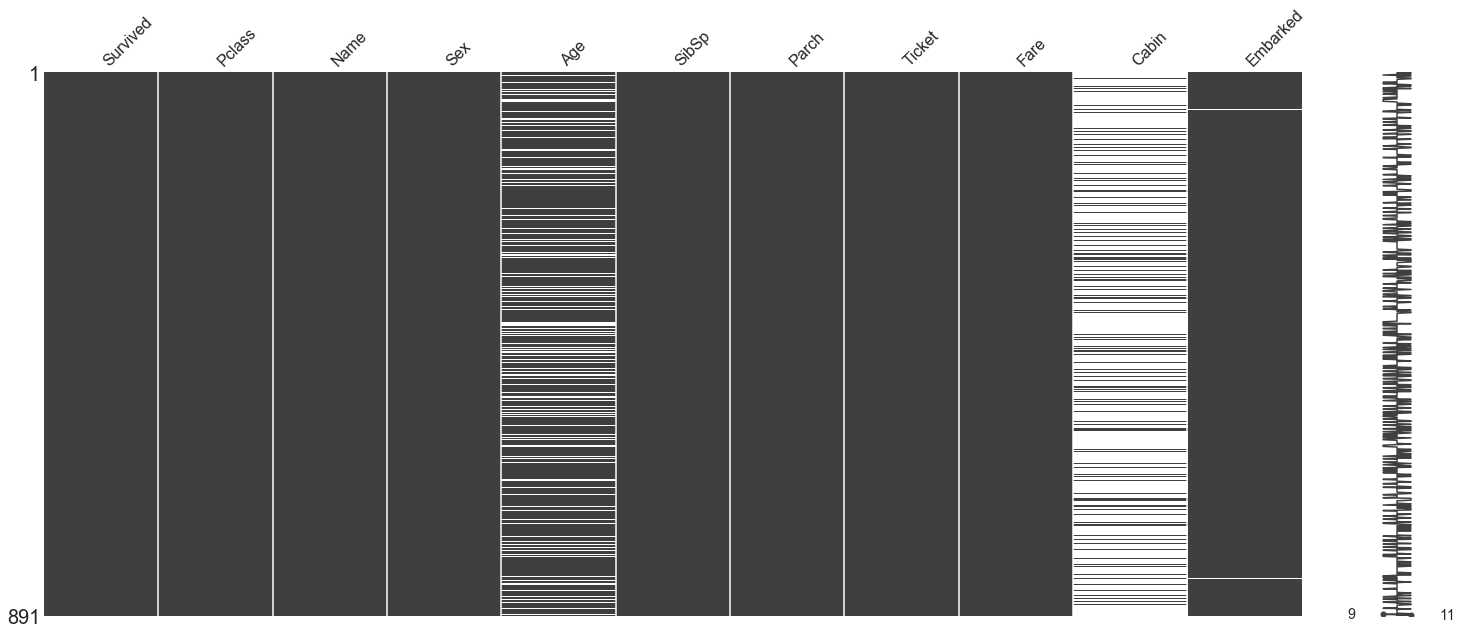

In [179]:
ms.matrix(data)

We can observe that there are missing values in 'Age', 'Cabin' and 'Embarked'. Let's continue.

### Visualization of data with Seaborn

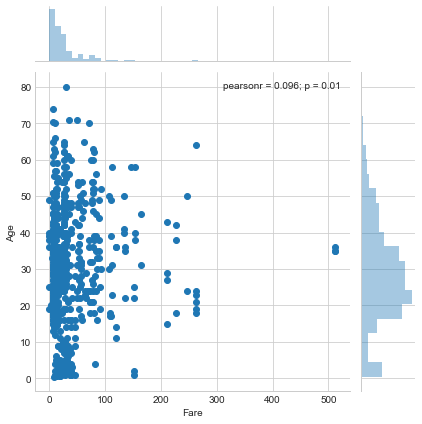

In [180]:
sns.jointplot(x='Fare',y='Age',data=data)

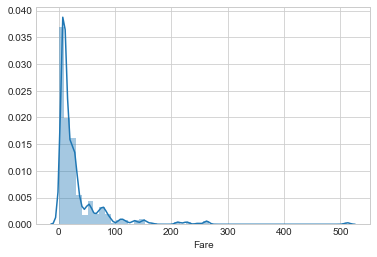

In [181]:
sns.distplot(data['Fare'])
#KDE?

In [182]:
data.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


Text(0.5,1,'data.corr()')

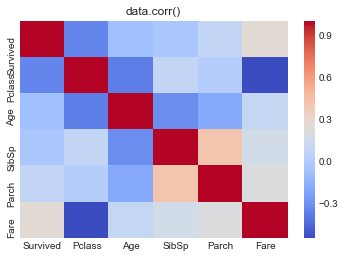

In [183]:
sns.heatmap(data.corr(),cmap='coolwarm')
plt.title('data.corr()')

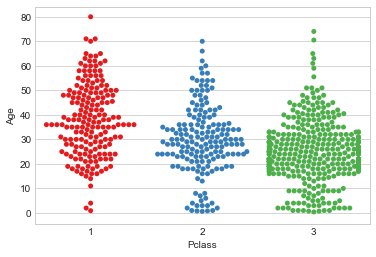

In [184]:
sns.swarmplot
sns.swarmplot(x='Pclass',y='Age',data=data,palette='Set1')

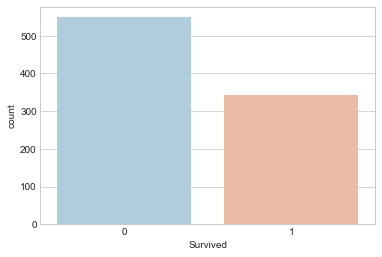

In [185]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=data,palette='RdBu_r')

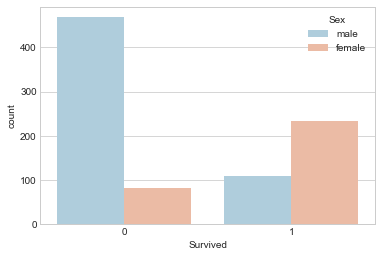

In [186]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=data,palette='RdBu_r')

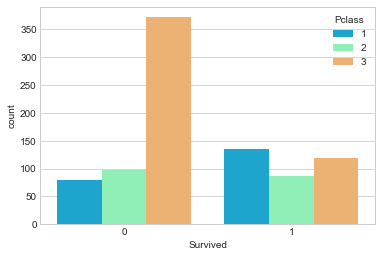

In [187]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data = data,palette='rainbow')

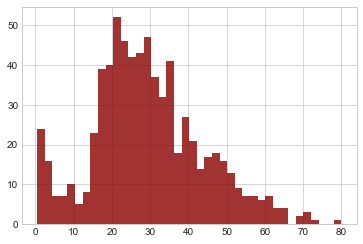

In [188]:
data['Age'].hist(bins = 40, color = 'darkred', alpha = 0.8)

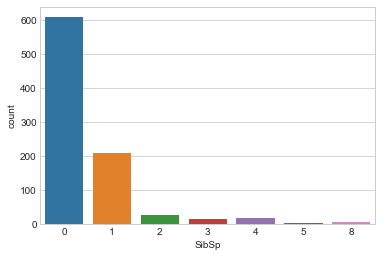

In [189]:
sns.countplot(x = 'SibSp', data = data)

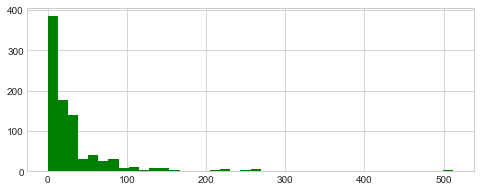

In [190]:
data['Fare'].hist(color = 'green', bins = 40, figsize = (8,3))

#### What do you observe from the above charts?

# Step - 4 : Feature Engineering

## Feature Engineering

We want to fill the missing values of the age in the dataset with the average age value for each of the classes. This is called data imputation.

In [191]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 123.5+ KB


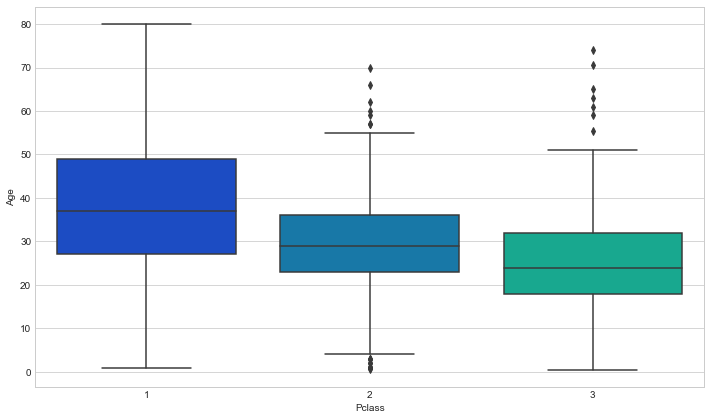

In [192]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=data,palette='winter')

In [193]:
# BL NOTE - Check the first 20 rows of age to see null values
data['Age'].head(20)

PassengerId
1     22.0
2     38.0
3     26.0
4     35.0
5     35.0
6      NaN
7     54.0
8      2.0
9     27.0
10    14.0
11     4.0
12    58.0
13    20.0
14    39.0
15    14.0
16    55.0
17     2.0
18     NaN
19    31.0
20     NaN
Name: Age, dtype: float64

In [194]:
# BL NOTE - Check the value countss for each class
data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [195]:
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [196]:
# BL NOTE - replace all null values within each class with the following
# Note that this function does not trigger the error: "A value is trying to be set on a copy of a slice from a DataFrame"
# That error is common on complex filtering like this and it took quite a while to work out a solution.
mean_age_Pclass1 = int(data.loc[data['Pclass']==1]['Age'].mean())
mean_age_Pclass2 = int(data.loc[data['Pclass']==2]['Age'].mean())
mean_age_Pclass3 = int(data.loc[data['Pclass']==3]['Age'].mean())

data.loc[(data['Age'].isnull() ) & (data['Pclass']==1), 'Age'] = mean_age_Pclass1
data.loc[(data['Age'].isnull() ) & (data['Pclass']==2), 'Age'] = mean_age_Pclass2
data.loc[(data['Age'].isnull() ) & (data['Pclass']==3), 'Age'] = mean_age_Pclass3

In [197]:
# BL NOTE - Different checks to ensure nulls removed from Age
#data[data['Pclass']==1]
#data[data['Age']==np.nan] # does not work - need to use .isnull()
#data[data['Age'].isnull()]
#data[(data['Age'].isnull() ) & (data['Pclass']==1)]
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

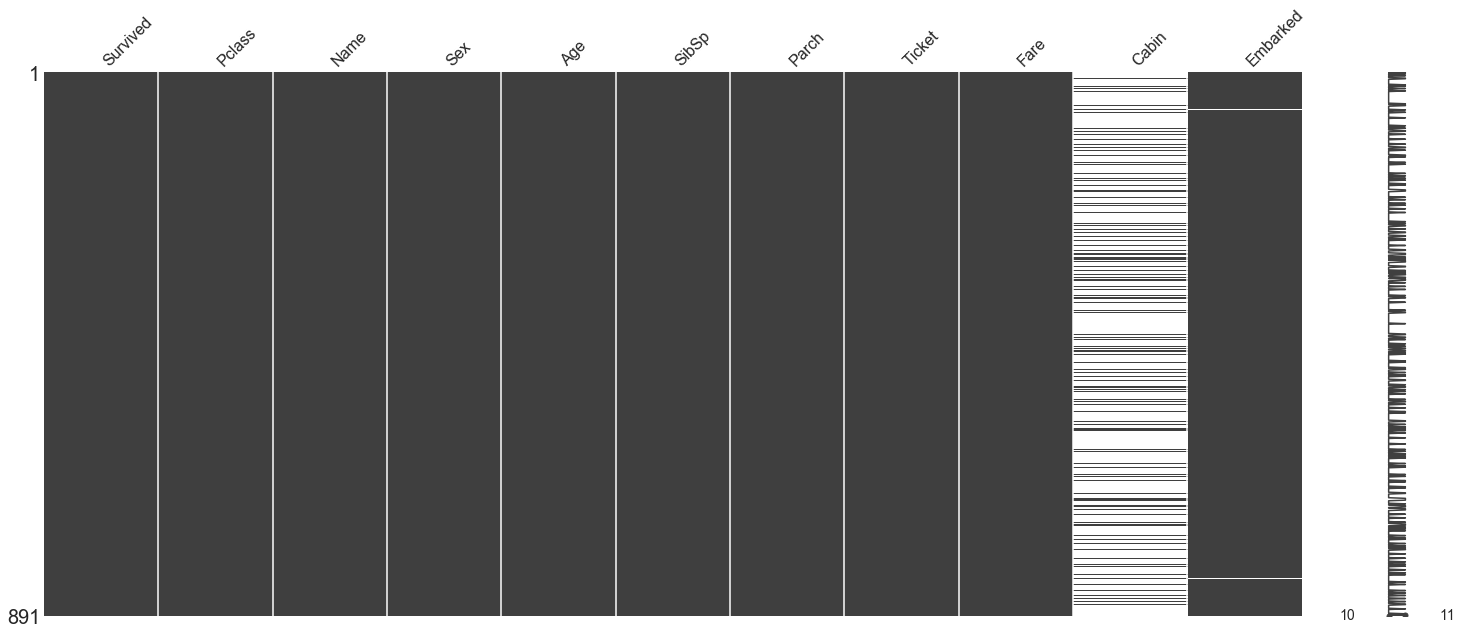

In [198]:
ms.matrix(data)

The Age column is imputed sucessfully.

Let's drop the Cabin column and the row in the Embarked that is NaN.

In [199]:
data = data.drop('Cabin',axis=1)
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

In [200]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [201]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [202]:
data.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    2
dtype: int64

In [203]:
data.dropna(inplace = True)

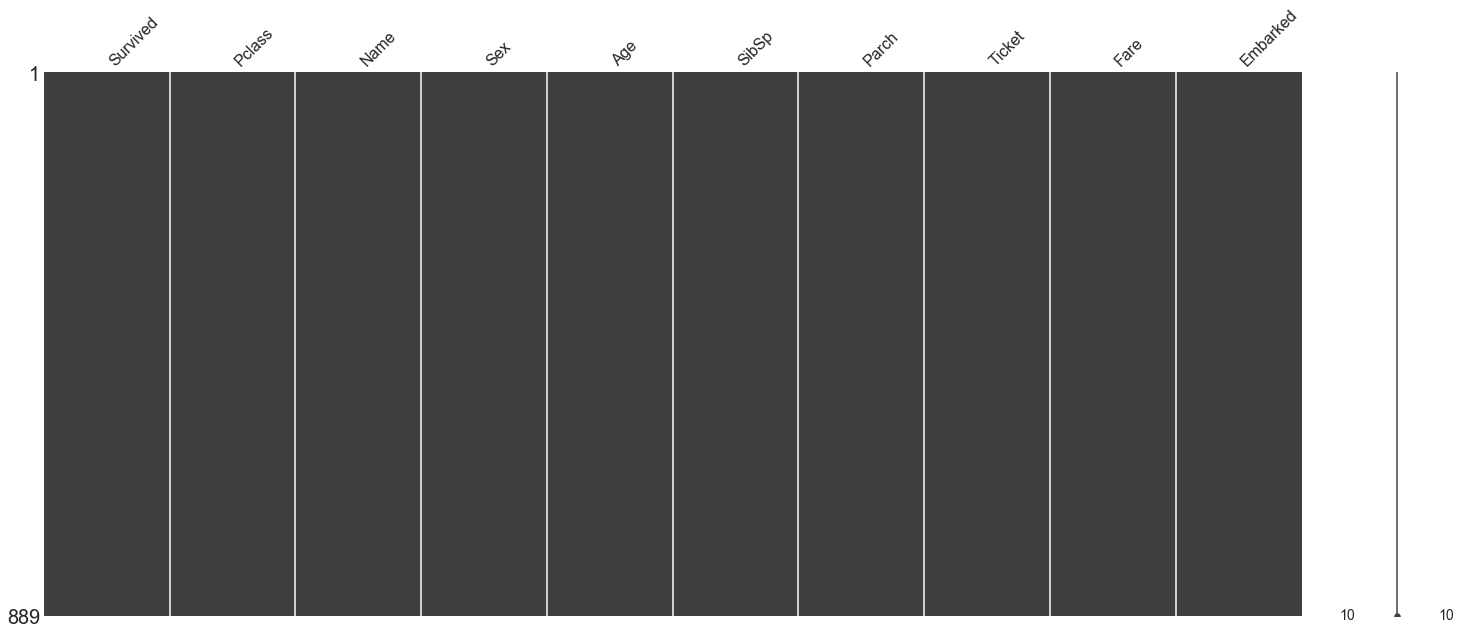

In [204]:
ms.matrix(data)

In [205]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 1 to 891
Data columns (total 10 columns):
Survived    889 non-null int64
Pclass      889 non-null int64
Name        889 non-null object
Sex         889 non-null object
Age         889 non-null float64
SibSp       889 non-null int64
Parch       889 non-null int64
Ticket      889 non-null object
Fare        889 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 76.4+ KB


## Converting Categorical Features 

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [206]:
data['Sex'].value_counts()

male      577
female    312
Name: Sex, dtype: int64

In [207]:
sex = pd.get_dummies(data['Sex'],drop_first=True)
sex.head()

,male
PassengerId,
1,1
2,0
3,0
4,0
5,1


Now the Sex (male or female) column was replaced with a Male column that is either 0 or 1 (false or true)

In [208]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [209]:
embark = pd.get_dummies(data['Embarked'],drop_first=True)
embark.head(10)

,Q,S
PassengerId,,
1,0,1
2,0,0
3,0,1
4,0,1
5,0,1
6,1,0
7,0,1
8,0,1
9,0,1


In [210]:
old_data = data.copy()
data.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,,
1,0,3,22.0,1,0,7.2500
2,1,1,38.0,1,0,71.2833
3,1,3,26.0,0,0,7.9250
4,1,1,35.0,1,0,53.1000
5,0,3,35.0,0,0,8.0500


In [211]:
data = pd.concat([data,sex,embark],axis=1)

In [212]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
PassengerId,,,,,,,,,
1,0,3,22.0,1,0,7.2500,1,0,1
2,1,1,38.0,1,0,71.2833,0,0,0
3,1,3,26.0,0,0,7.9250,0,0,1
4,1,1,35.0,1,0,53.1000,0,0,1
5,0,3,35.0,0,0,8.0500,1,0,1


In [213]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 1 to 891
Data columns (total 9 columns):
Survived    889 non-null int64
Pclass      889 non-null int64
Age         889 non-null float64
SibSp       889 non-null int64
Parch       889 non-null int64
Fare        889 non-null float64
male        889 non-null uint8
Q           889 non-null uint8
S           889 non-null uint8
dtypes: float64(2), int64(4), uint8(3)
memory usage: 51.2 KB


In [214]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.206040,0.524184,0.382452,32.096681,0.649044,0.086614,0.724409
std,0.486260,0.834700,13.177747,1.103705,0.806761,49.697504,0.477538,0.281427,0.447063
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000
50%,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200,1.000000,0.000000,1.000000
75%,1.000000,3.000000,36.500000,1.000000,0.000000,31.000000,1.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


All numbers are now numeric and not null.  We can now run the Machine Learning model

# Step - 5 : Model Selection

## Building a Logistic Regression model

In [215]:
X = data.drop('Survived',axis=1)
y = data['Survived']

In [216]:
from sklearn.model_selection import train_test_split

In [217]:
X_train, X_test, y_train, y_test = train_test_split(X,y 
                                                    , test_size=0.15, 
                                                    random_state=42)

In [218]:
len(y_test)

134

In [219]:
len(data)

889

In [220]:
# 178/889
len(y_test) / len(data)

0.15073115860517436

In [221]:
X.describe()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,2.311586,29.206040,0.524184,0.382452,32.096681,0.649044,0.086614,0.724409
std,0.834700,13.177747,1.103705,0.806761,49.697504,0.477538,0.281427,0.447063
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000
50%,3.000000,26.000000,0.000000,0.000000,14.454200,1.000000,0.000000,1.000000
75%,3.000000,36.500000,1.000000,0.000000,31.000000,1.000000,0.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


In [222]:
X_train.describe()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
count,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000
mean,2.315232,29.388967,0.552318,0.396026,32.145750,0.650331,0.091391,0.724503
std,0.836006,13.446087,1.146256,0.829327,48.548195,0.477181,0.288355,0.447060
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000
50%,3.000000,26.000000,0.000000,0.000000,14.500000,1.000000,0.000000,1.000000
75%,3.000000,37.000000,1.000000,0.000000,31.275000,1.000000,0.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


In [223]:
y_train.describe()

count    755.000000
mean       0.388079
std        0.487636
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

In [224]:
from sklearn.linear_model import LogisticRegression

# Build the Model.
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train) # this is where training happens

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [225]:
logmodel.coef_

array([[-0.86150735, -0.03108453, -0.31136092, -0.06023965,  0.00435851,
        -2.40966005, -0.05137708, -0.24766665]])

#### Determine the Features that have the most impact on survival
Get the feature weights, convert from multi-layer array to a list so they can be matched with corresponding feature names

In [266]:
# Get a list of the features
features = list(X_train.columns.values)
features

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S']

In [278]:
feat_impact = pd.DataFrame(features)
feat_impact.set_index(0, inplace=True)
feat_impact

""
0
Pclass
Age
SibSp
Parch
Fare
male
Q
S


In [279]:
weights = list(logmodel.coef_[0] )
feat_impact['weights'] = weights
feat_impact

,weights
0,
Pclass,-0.861507
Age,-0.031085
SibSp,-0.311361
Parch,-0.060240
Fare,0.004359
male,-2.409660
Q,-0.051377
S,-0.247667


In [280]:
# Get the mean values for each Feature
feat_impact['mean'] = pd.DataFrame(X_train.mean())
feat_impact

,weights,mean
0,,
Pclass,-0.861507,2.315232
Age,-0.031085,29.388967
SibSp,-0.311361,0.552318
Parch,-0.060240,0.396026
Fare,0.004359,32.145750
male,-2.409660,0.650331
Q,-0.051377,0.091391
S,-0.247667,0.724503


In [269]:
# cross check against describe
X_train.describe()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
count,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000
mean,2.315232,29.388967,0.552318,0.396026,32.145750,0.650331,0.091391,0.724503
std,0.836006,13.446087,1.146256,0.829327,48.548195,0.477181,0.288355,0.447060
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000
50%,3.000000,26.000000,0.000000,0.000000,14.500000,1.000000,0.000000,1.000000
75%,3.000000,37.000000,1.000000,0.000000,31.275000,1.000000,0.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


In [282]:
# Multiply the weights by the average value for each feature to see the impact
feat_impact['impact'] = feat_impact['weights'] * feat_impact['mean']
feat_impact

,weights,mean,impact
0,,,
Pclass,-0.861507,2.315232,-1.994589
Age,-0.031085,29.388967,-0.913542
SibSp,-0.311361,0.552318,-0.171970
Parch,-0.060240,0.396026,-0.023856
Fare,0.004359,32.145750,0.140108
male,-2.409660,0.650331,-1.567077
Q,-0.051377,0.091391,-0.004695
S,-0.247667,0.724503,-0.179435


In [284]:
feat_impact['abs_impact'] = feat_impact['impact'].apply(lambda w: abs(w))
feat_impact

,weights,mean,impact,abs_impact
0,,,,
Pclass,-0.861507,2.315232,-1.994589,1.994589
Age,-0.031085,29.388967,-0.913542,0.913542
SibSp,-0.311361,0.552318,-0.171970,0.171970
Parch,-0.060240,0.396026,-0.023856,0.023856
Fare,0.004359,32.145750,0.140108,0.140108
male,-2.409660,0.650331,-1.567077,1.567077
Q,-0.051377,0.091391,-0.004695,0.004695
S,-0.247667,0.724503,-0.179435,0.179435


In [287]:
# Sort by abs_impact to see each feature's impact on survival from most to least
feat_impact.sort_values(by='abs_impact', ascending=False)

,weights,mean,impact,abs_impact
0,,,,
Pclass,-0.861507,2.315232,-1.994589,1.994589
male,-2.409660,0.650331,-1.567077,1.567077
Age,-0.031085,29.388967,-0.913542,0.913542
S,-0.247667,0.724503,-0.179435,0.179435
SibSp,-0.311361,0.552318,-0.171970,0.171970
Fare,0.004359,32.145750,0.140108,0.140108
Parch,-0.060240,0.396026,-0.023856,0.023856
Q,-0.051377,0.091391,-0.004695,0.004695


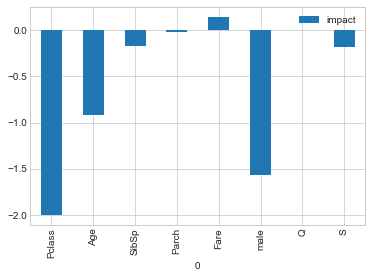

In [292]:
# Visualize the impact of each feature using Pandas / matplotlib data viz
feat_impact.plot.bar(y='impact')

In [293]:
# TODO - Normalize the data before calculating the weights and impacts

In [294]:
logmodel.intercept_

array([ 4.10187773])

In [295]:
logmodel.verbose

0

In [296]:
predict =  logmodel.predict(X_test)
predict[:5]

array([0, 1, 1, 0, 1])

In [297]:
y_test[:5]

PassengerId
282    0
436    1
40     1
419    0
586    1
Name: Survived, dtype: int64

Let's move on to evaluate our model.

# Step - 6 : Evaluation

## Evaluation

We can check precision, recall, f1 - score using classification report!

#### Confusion Matrix

In [298]:
from sklearn.metrics import confusion_matrix, classification_report

## [Confusion Matrix (sklearn method)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)
### BL NOTE - THIS LAYOUT IS DIFFERENT FROM [WIKIPEDIA](https://en.wikipedia.org/wiki/Confusion_matrix) BUT USED BY SKLEARN AND WILL LINE UP WITH THE DATA BELOW

True negative   |	False positive,  
________________|________________  
                |                  
False negative  |	True positive

- **ROWS = ACTUAL RESULTS**
  - 1st row = actual NO
  - 2nd row = actual YES

- **COLUMNS = PREDICTED RESULTS**
  - 1st column = predicted NO
  - 2nd column = actual YES

In [321]:
conf_matr = confusion_matrix(y_test, predict)
conf_matr

array([[76, 11],
       [12, 35]])

In [322]:
tn, fp, fn, tp = conf_matr.ravel()
tp

35

#### Precision Score

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

The best value is 1 and the worst value is 0.

In [323]:
from sklearn.metrics import precision_score

In [324]:
# Precision = TP / (TP + FP)
# Precision = 76 / (76 + 11)
print(precision_score(y_test,predict))

0.760869565217


In [329]:
precision = tp / (tp + fp)
precision

0.76086956521739135

#### Recall score

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The best value is 1 and the worst value is 0.

In [326]:
from sklearn.metrics import recall_score

In [327]:
print(recall_score(y_test,predict))

0.744680851064


In [330]:
recall = tp / (tp + fn)
recall

0.74468085106382975

#### f1_score

The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is:
                F1 = 2 \* (precision \* recall) / (precision + recall)

In [332]:
from sklearn.metrics import f1_score

In [333]:
print(f1_score(y_test,predict))

0.752688172043


In [334]:
f1 = 2 * (precision * recall) / (precision + recall)
f1

0.75268817204301086

To get all the above metrics at one go, use the following function:

In [335]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predict))

             precision    recall  f1-score   support

          0       0.86      0.87      0.87        87
          1       0.76      0.74      0.75        47

avg / total       0.83      0.83      0.83       134



# Step - 7 : Predict on New Cases

## Prediction on Test Data From Kaggle

create an account on www.kaggle.com

In [350]:
# FOR GOOGLE COLAB - UNCOMMENT THE LINES BELOW
# !wget https://www.dropbox.com/s/6hyaidkuyfsv45u/production.csv
# prod_data=pd.read_csv('production.csv')

In [354]:
# FOR JUPYTER NOTEBOOK - UNCOMMENT THE LINE BELOW
prod_data=pd.read_csv('Titanic Data-Test.csv')

In [357]:
prod_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [358]:
prod_data.set_index('PassengerId', inplace=True)

In [359]:
prod_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [360]:
prod_data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


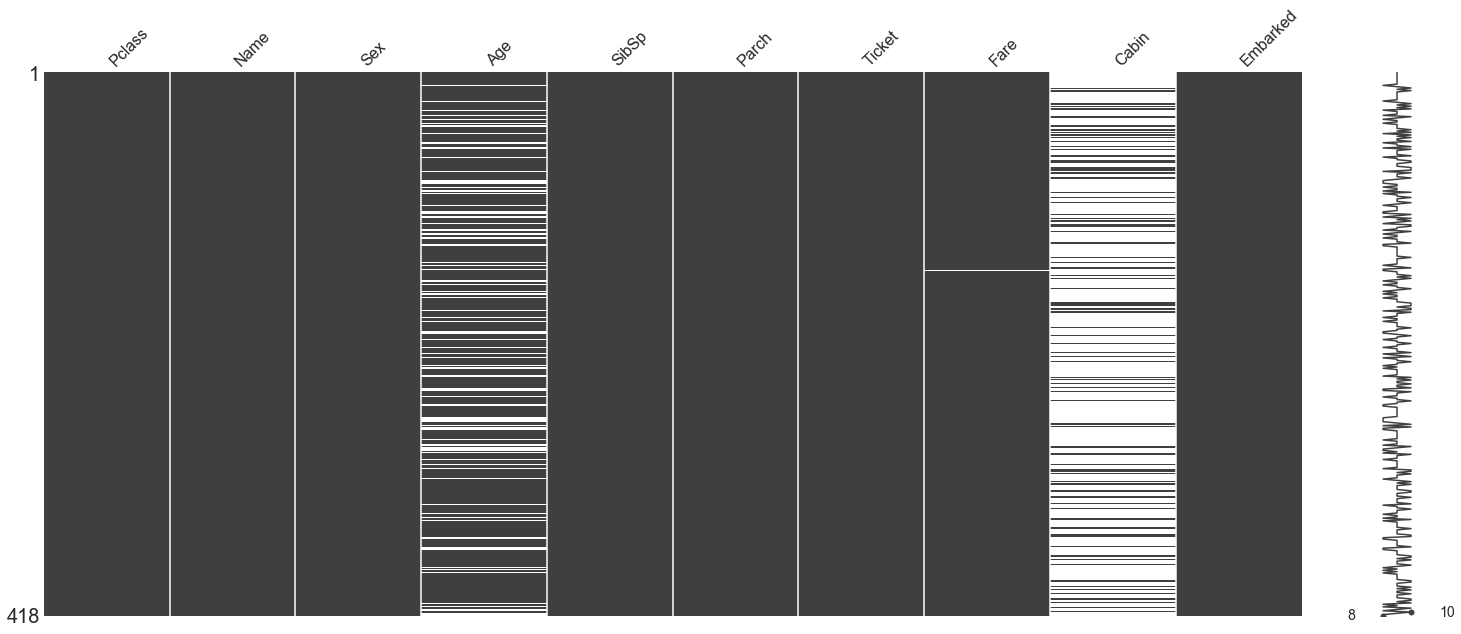

In [361]:
ms.matrix(prod_data)

### Data Cleaning

There are inconsistencies in test data.We can use the same graph functions that are used to visualize the train data for test data as well.We use the same data cleaning techniques like removing the cabin column and applying impute_age function on age column on test data.  
But we cannot remove any rows because kaggle wants same number of rows in submission csv also. So we fill the missing values in fare with mean.

In [363]:
# Assign mean age broken down by class
prod_mean_age_Pclass1 = int(prod_data.loc[prod_data['Pclass']==1]['Age'].mean() )
prod_mean_age_Pclass2 = int(prod_data.loc[prod_data['Pclass']==2]['Age'].mean() )
prod_mean_age_Pclass3 = int(prod_data.loc[prod_data['Pclass']==3]['Age'].mean() )

prod_data.loc[(prod_data['Age'].isnull() ) & (prod_data['Pclass']==1), 'Age'] = prod_mean_age_Pclass1
prod_data.loc[(prod_data['Age'].isnull() ) & (prod_data['Pclass']==2), 'Age'] = prod_mean_age_Pclass2
prod_data.loc[(prod_data['Age'].isnull() ) & (prod_data['Pclass']==3), 'Age'] = prod_mean_age_Pclass3

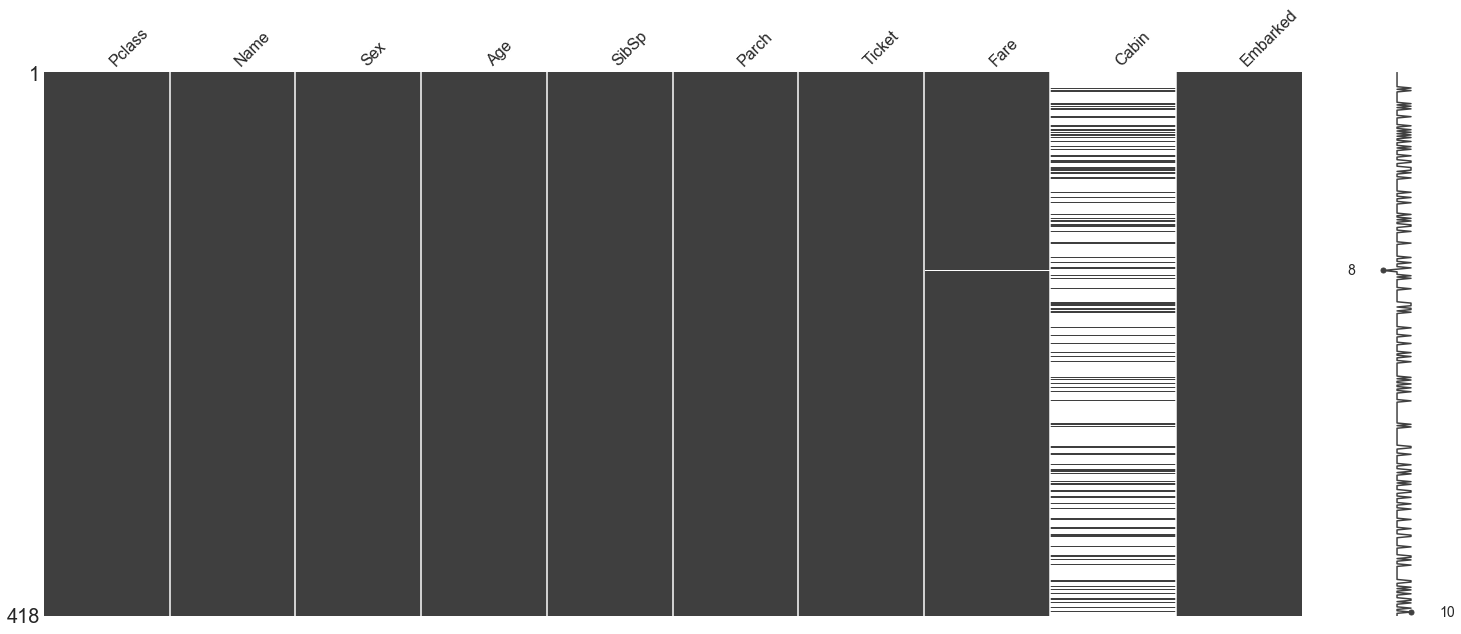

In [364]:
ms.matrix(prod_data)

In [365]:
prod_data.drop('Cabin', axis = 1, inplace= True)

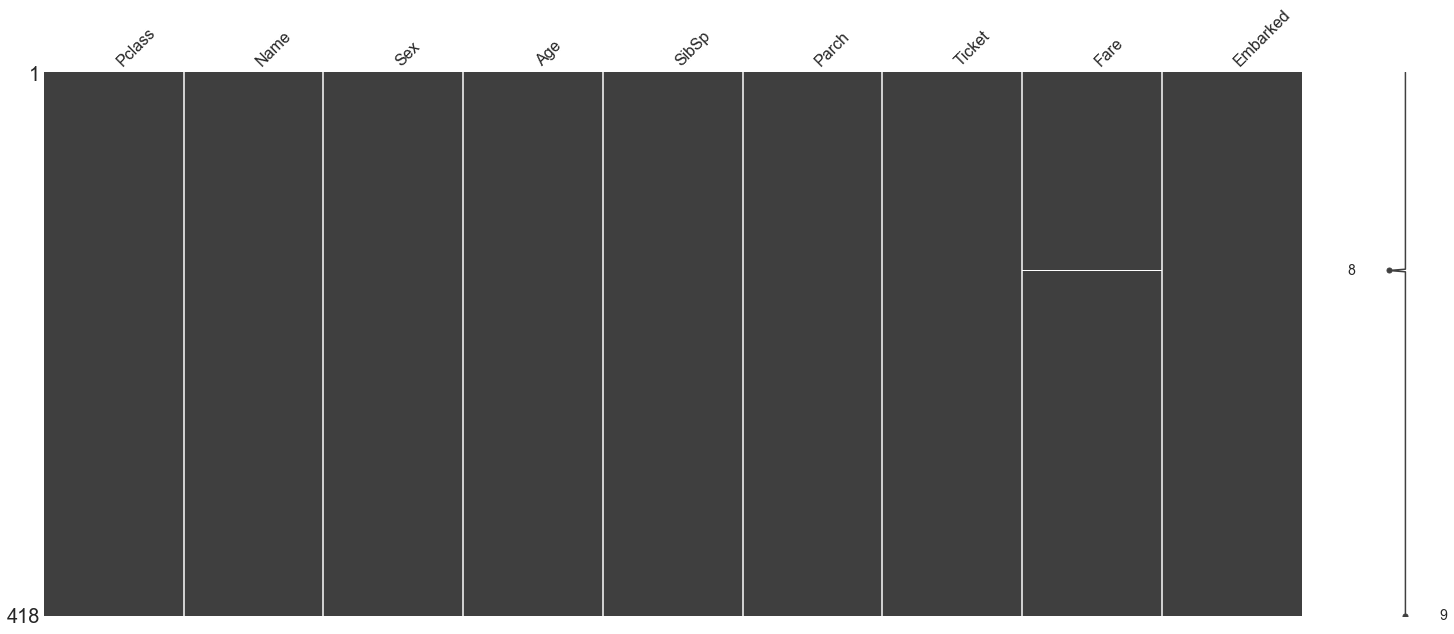

In [366]:
ms.matrix(prod_data)

In [367]:
prod_data.fillna(prod_data['Fare'].mean(),inplace=True)

In [368]:
prod_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 9 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         418 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        418 non-null float64
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(4)
memory usage: 32.7+ KB


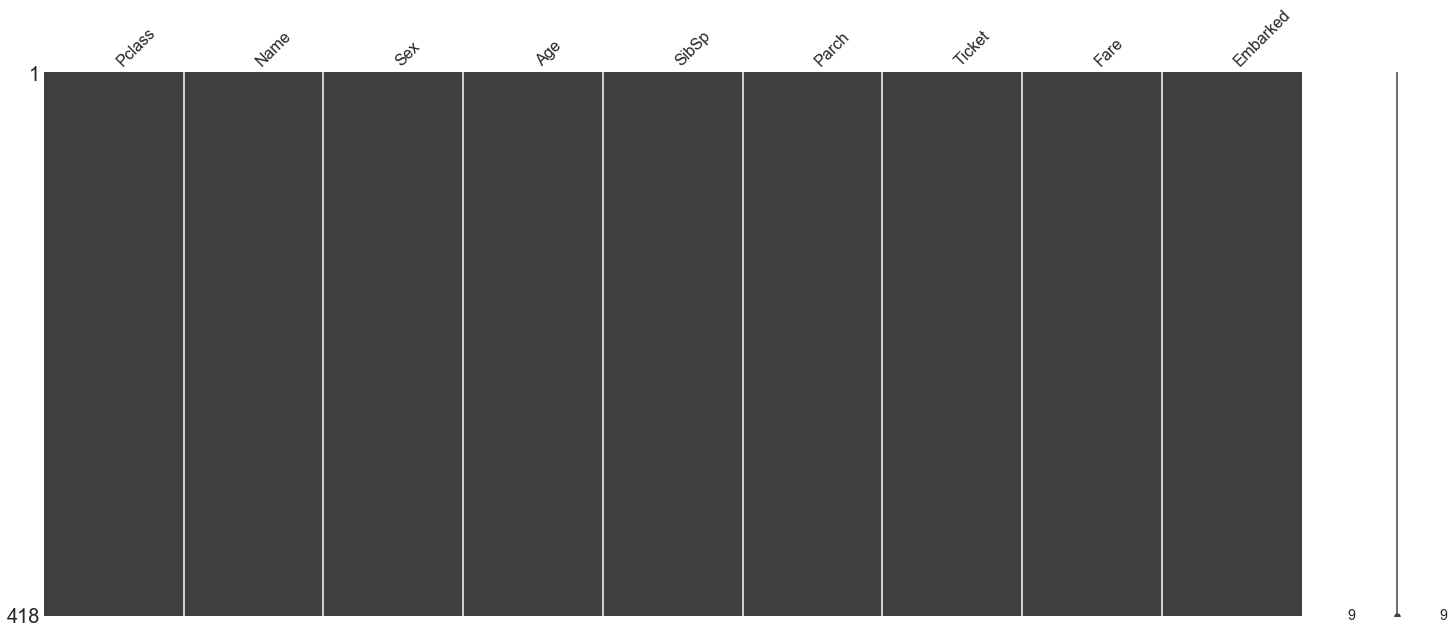

In [369]:
ms.matrix(prod_data)

In [370]:
sex = pd.get_dummies(prod_data['Sex'], drop_first=True)
embark = pd.get_dummies(prod_data['Embarked'], drop_first=True)

prod_data.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

prod_data = pd.concat([prod_data,sex,embark],axis=1)

In [371]:
prod_data.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
PassengerId,,,,,,,,
892,3,34.5,0,0,7.8292,1,1,0
893,3,47.0,1,0,7.0000,0,0,1
894,2,62.0,0,0,9.6875,1,1,0
895,3,27.0,0,0,8.6625,1,0,1
896,3,22.0,1,1,12.2875,0,0,1


In [372]:
predict1=logmodel.predict(prod_data)

In [373]:
predict1

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0,

In [374]:
df1=pd.DataFrame(predict1,columns=['Survived'])

In [378]:
df2=pd.DataFrame(prod_data.index)

In [379]:
df2.head()

,PassengerId
0,892
1,893
2,894
3,895
4,896


In [381]:
result = pd.concat([df2,df1],axis=1)
result.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [382]:
# FOR GOOGLE COLAB - UNCOMMENT LINES BELOW
# from google.colab import files
# files.download(filename) 

In [383]:
# FOR JUPYTER NOTEBOOK - UNCOMMENT LINES BELOW AND UPDATE FILENAME
filename = "Titanic result v6 2019-05-04.csv"
result.to_csv(filename, index=False)

Submit the file to https://www.kaggle.com/c/titanic

---
                                                     THE END